# Census Income Project
### Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

# Importing required libraries

In [42]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pylab import rcParams  # for plotting box plot, to check outliers
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler  # for scaling

pd.pandas.set_option('display.max_columns',None)  # To display, all columns

In [43]:
#model developemnt libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [44]:
df = pd.read_csv('census_income.csv')

# Getting to Know Data

In [45]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [46]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [47]:
df.sample(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
22516,21,Private,145389,Some-college,10,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,25,United-States,<=50K
7074,28,?,291374,HS-grad,9,Separated,?,Unmarried,Black,Female,0,0,30,United-States,<=50K
3923,50,Private,116287,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,60,Columbia,<=50K
1209,44,Self-emp-inc,320984,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,5178,0,60,United-States,>50K
10076,58,Private,225603,9th,5,Divorced,Farming-fishing,Not-in-family,Black,Male,0,0,40,United-States,<=50K


In [48]:
df.shape

(32560, 15)

### Observation - 
There are 15 columns and total 32560 records. Columns describing below information
   - Age
   - Workclass
   - Fnlwgt
   - Education
   - Education_num
   - Marital_status
   - Occupation
   - Relationship
   - Race
   - Sex
   - Capital_gain
   - Capital_loss
   - Hours_per_week
   - Native_country
   - Income

Also there are some missing values with ? in features, we will explore these in Handling missing values

# Getting to Overview of Data Types Data

In [50]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [51]:
numerical_data = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Total Numerical Features are = ',len(numerical_data))

Total Numerical Features are =  6


In [52]:
categorical_data = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Total Categorical Features are = ',len(categorical_data))

Total Categorical Features are =  9


### Conclusion - 
   - It is clear that there are 6 Numerical Features
   - There are 9 categorical feature, including Name

# Handling Duplicate Values

In [53]:
df.shape

(32560, 15)

In [54]:
df.drop_duplicates(inplace=True)

In [55]:
df.shape

(32536, 15)

### Observation -
   - We have dropped 26 values from data set. 

## Exploring five number summery for Numerical Data

In [57]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Conclusion - 
Based on above data, we can say that
1. For count column - There are no missing values in numerical features
2. Age of employee working is 38. Also 50% employees are below 37.
3. Education_num - Describing education of Employee
4. Capital loss - Loss of employee
5. Hours_per_week - Total working hours

# Exploring Categorical Data

In [60]:
df.describe(include="O")

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32536,32536,32536,32536,32536,32536,32536,32536,32536
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22673,10494,14970,4136,13187,27794,21774,29152,24697


### Conclusion - 
Based on above data, we can say that
1. Workclass -
    - There are 9 categories in workclass
    - 22673 people working in private organisation
2. Education - 
    - Out of 16 categories, HS-grad people are more with 10494 count.
3. Marital_status
    - 7	categories with Married-civ-spouse being mode with 14970 qty.
4. Occupation
    - 15 categories, mode of Prof-specialty with 4136.
5. Relationship
    - 6 categories with husband being 13187 times.
6. Race
    - Total 5 races with White being Mode with 27794 count
7. Sex
    - 2 gender with Male as mode with 21774
8. Native_country
    - 42 cate, with most people are from United-States
9. Income
    - 21697 people are earning less than 50k






# Checking missing values

In [61]:
# Checking total number of missing values
df.isnull().sum().sum()

0

In [62]:
df.size

488040

In [63]:
# Checking feature wise missing values from dataset
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [73]:
cols = df.columns.to_list()
for feature in cols:
    print(f'Total Unique Values in {feature} are \n {df[feature].unique()}\n')

Total Unique Values in Age are 
 [50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

Total Unique Values in Workclass are 
 [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

Total Unique Values in Fnlwgt are 
 [ 83311 215646 234721 ...  34066  84661 257302]

Total Unique Values in Education are 
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Total Unique Values in Education_num are 
 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Total Unique Values in Marital_status are 
 [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']



### Conclusion: 
    1. There is presence of "?" in Workclass, Occupation, Native_country and it should be dropped or replaced.

In [75]:
df = pd.read_csv('census_income.csv', na_values=[" ?"])

In [76]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

## Dropping Features with missing values

In [80]:
missing = df[df.isnull().any(axis=1)]
missing

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
13,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
26,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
37,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,>50K
50,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,<=50K
60,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
32530,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
32540,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [83]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [84]:
df.dropna(axis=0, inplace=True)

In [85]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [86]:
df.shape

(30161, 15)

### Observation
    - Total 7.29 % data loss

# Checking Data Distribuion

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>],
       [<AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>],
       [<AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>]], dtype=object)

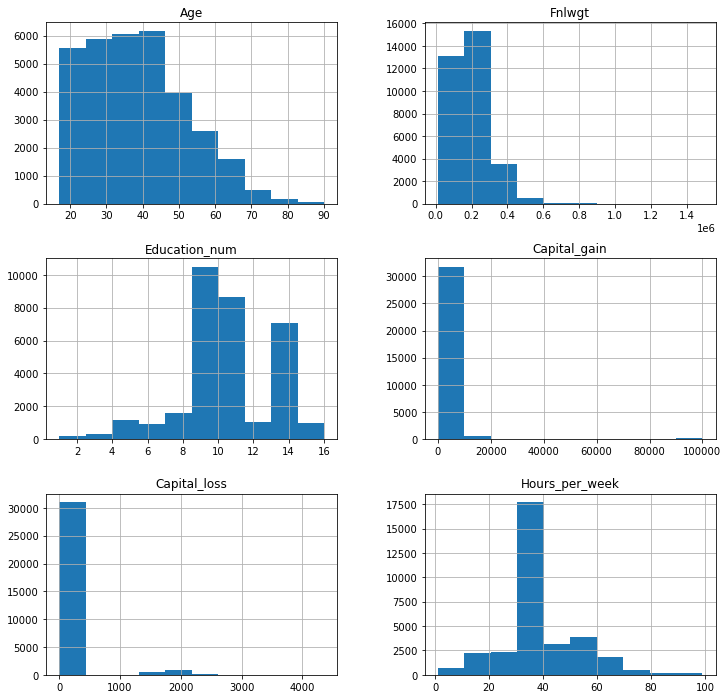

In [20]:
df.hist(figsize=(12,12))

### Observation - 
1. From above plots, we can say that there is some skewness in plots.

# Data Visualization

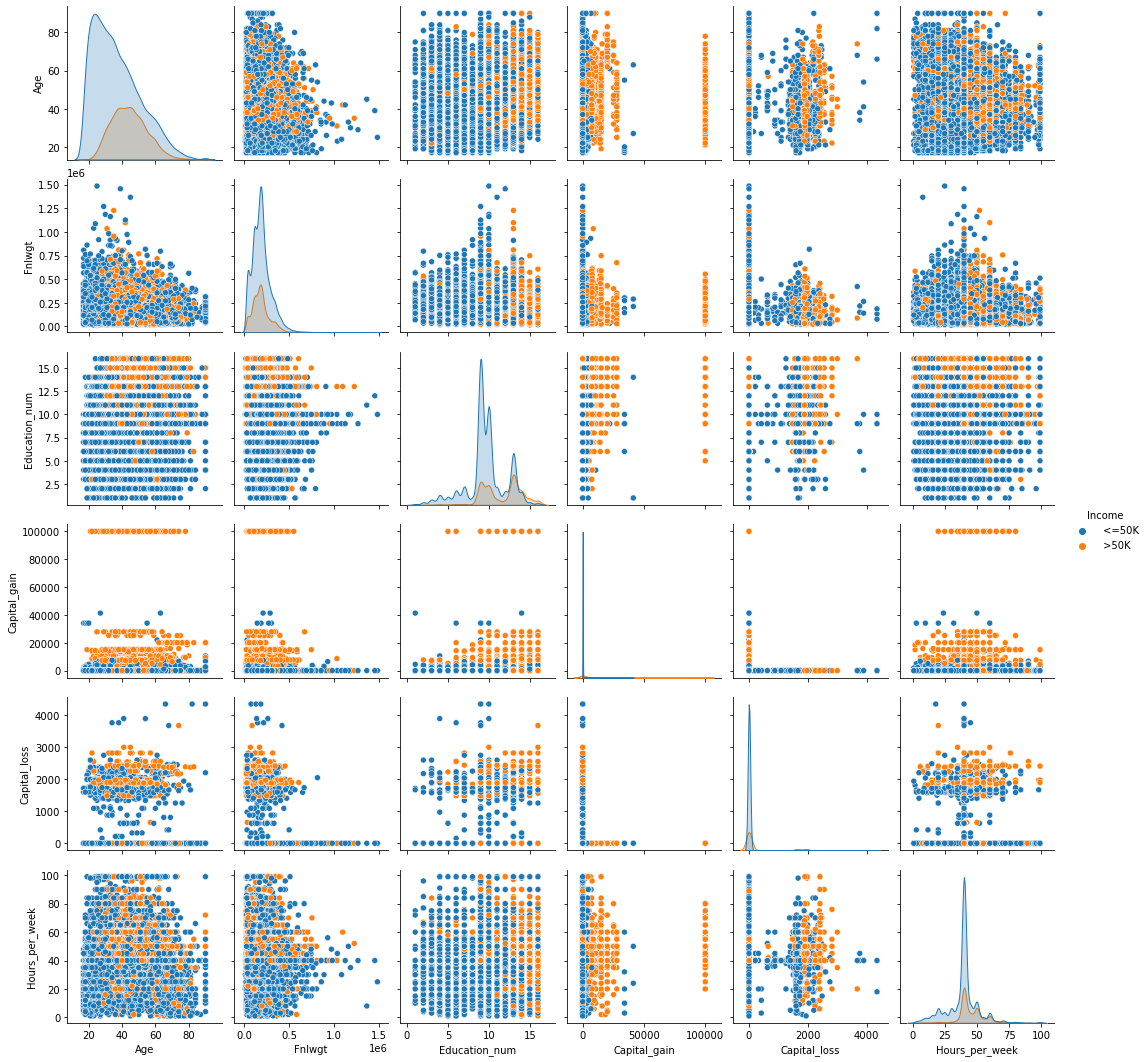

In [30]:
# Checking plot with Hue as Survived
sns.pairplot(df,hue='Income')

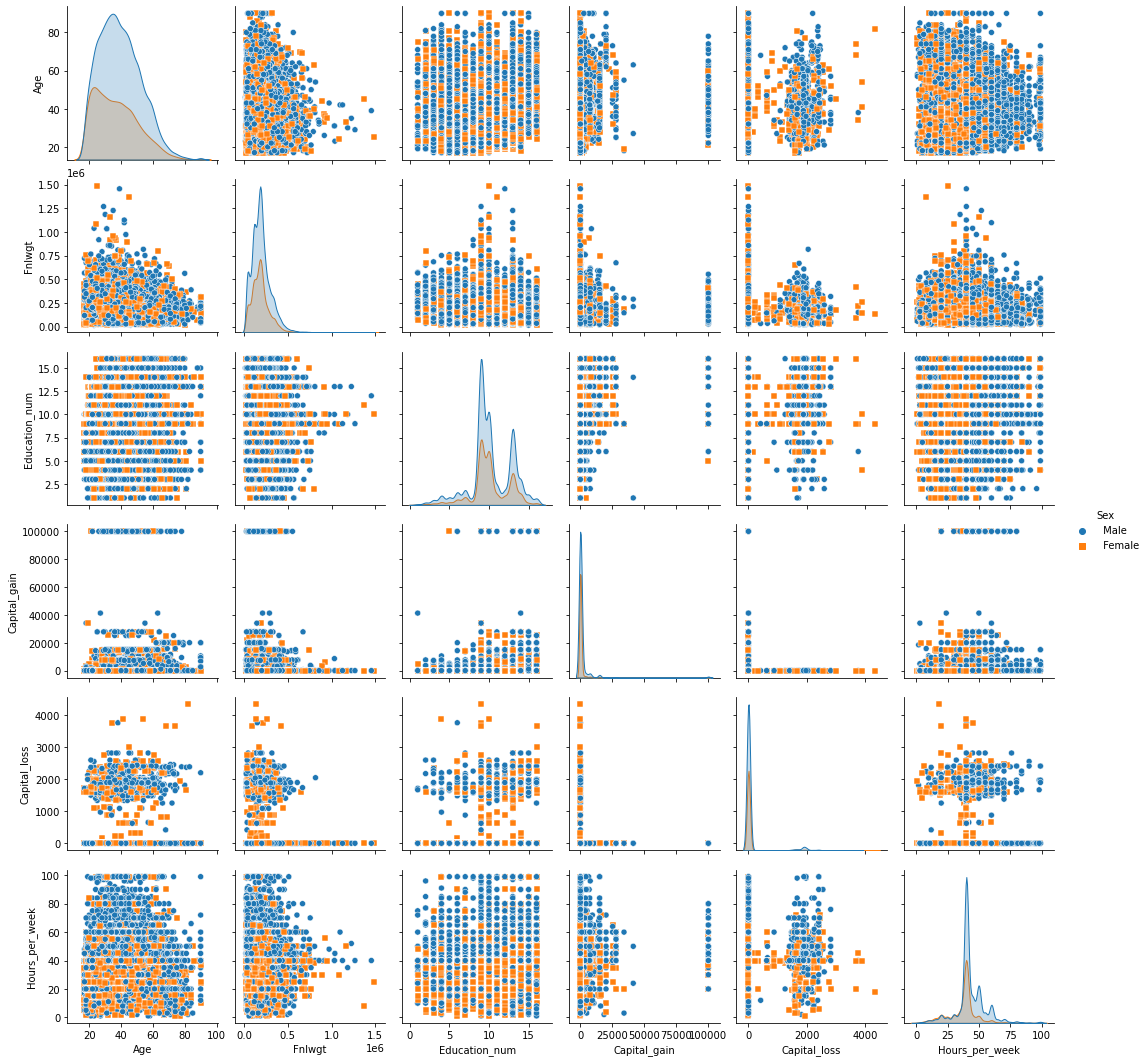

In [87]:
# Checking plot with Hue as Sex
sns.pairplot(df,hue='Sex', markers=["o", "s"])

### Conclusion - 
   - Data distribution is not uniform
   - Employees with higher educacation lever earning more money
   - Outliers present in data set

Text(0.5, 1.0, 'Income V/s Sex')

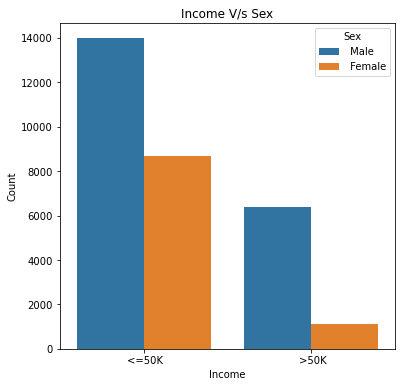

In [92]:
plt.figure(figsize=(6,6))
sns.countplot(x='Income', data= df, hue='Sex')
# plt.xlabel('0: Died and 1: Survived ')
plt.ylabel('Count')
plt.title('Income V/s Sex')

Text(0.5, 1.0, 'Income V/s Education')

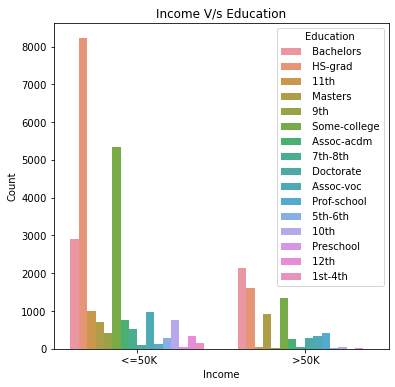

In [91]:
plt.figure(figsize=(6,6))
sns.countplot(x='Income', data= df, hue='Education')
# plt.xlabel('0: Died and 1: Survived ')
plt.ylabel('Count')
plt.title('Income V/s Education')

Text(0.5, 1.0, 'Income V/s Education')

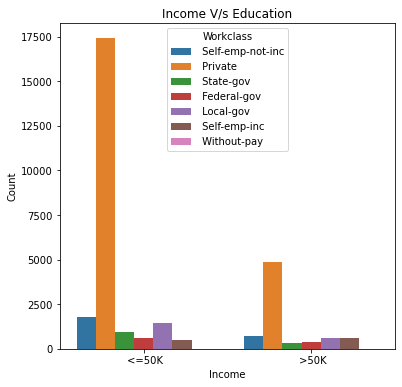

In [95]:
plt.figure(figsize=(6,6))
sns.countplot(x='Income', data= df, hue='Workclass')
# plt.xlabel('0: Died and 1: Survived ')
plt.ylabel('Count')
plt.title('Income V/s Education')

Text(0.5, 1.0, 'Income V/s Marital_status')

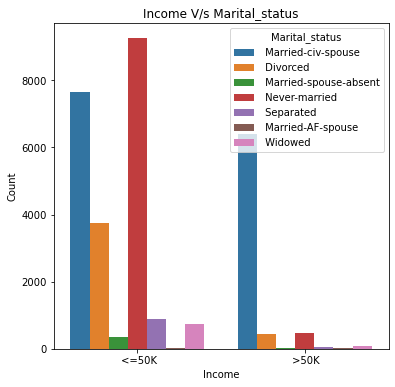

In [96]:
plt.figure(figsize=(6,6))
sns.countplot(x='Income', data= df, hue='Marital_status')
# plt.xlabel('0: Died and 1: Survived ')
plt.ylabel('Count')
plt.title('Income V/s Marital_status')

Text(0.5, 1.0, 'Income V/s Occupation')

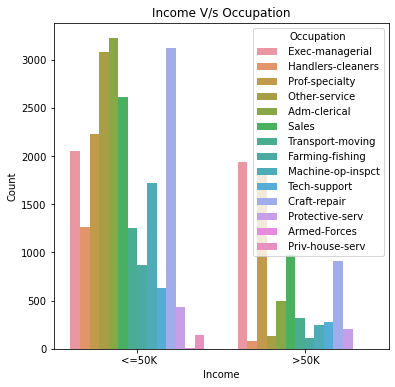

In [98]:
plt.figure(figsize=(6,6))
sns.countplot(x='Income', data= df, hue='Occupation')
# plt.xlabel('0: Died and 1: Survived ')
plt.ylabel('Count')
plt.title('Income V/s Occupation')

Text(0.5, 1.0, 'Income V/s Race')

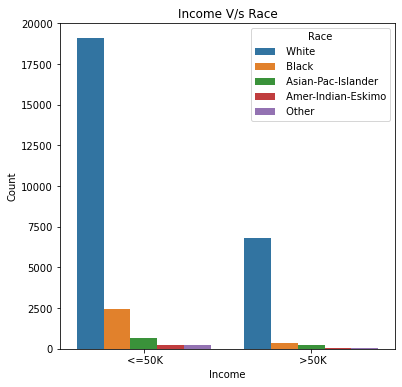

In [99]:
plt.figure(figsize=(6,6))
sns.countplot(x='Income', data= df, hue='Race')
# plt.xlabel('0: Died and 1: Survived ')
plt.ylabel('Count')
plt.title('Income V/s Race')

In [104]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,30161.000000,3.016100e+04,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.437883,1.897976e+05,10.121216,1091.971984,88.375419,40.931269
std,13.134882,1.056527e+05,2.549983,7406.466659,404.304753,11.980182
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176280e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784290e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376300e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:xlabel='Age', ylabel='Density'>

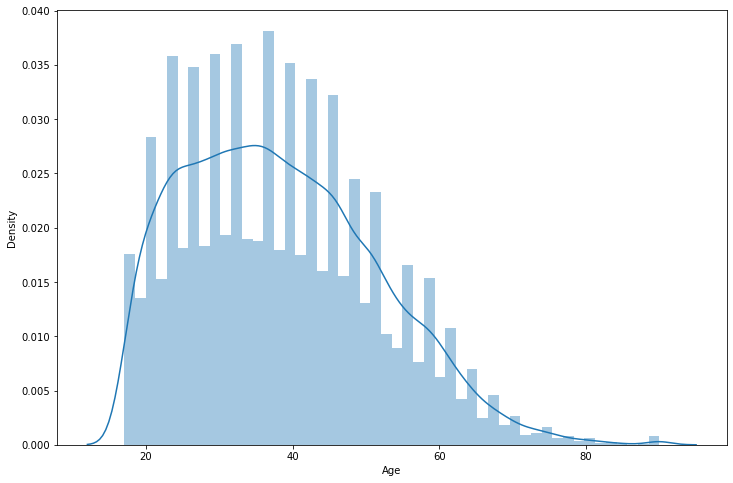

In [105]:
plt.figure(figsize=(12,8))
sns.distplot(df.Age, kde = True)

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

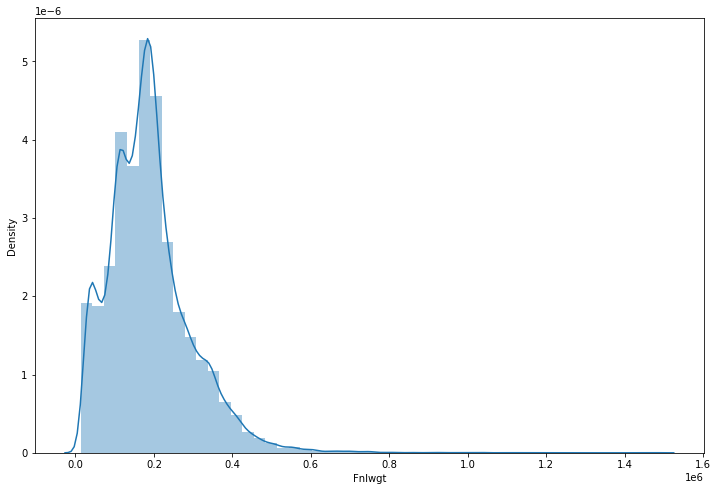

In [106]:
plt.figure(figsize=(12,8))
sns.distplot(df.Fnlwgt, kde = True)

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

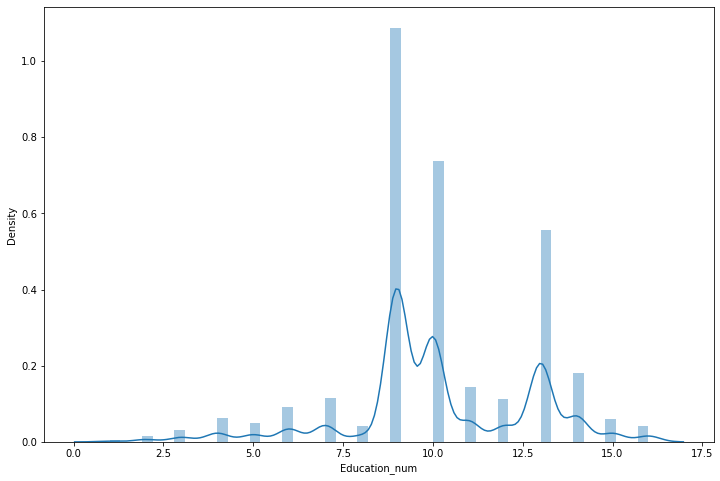

In [107]:
plt.figure(figsize=(12,8))
sns.distplot(df.Education_num, kde = True)

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

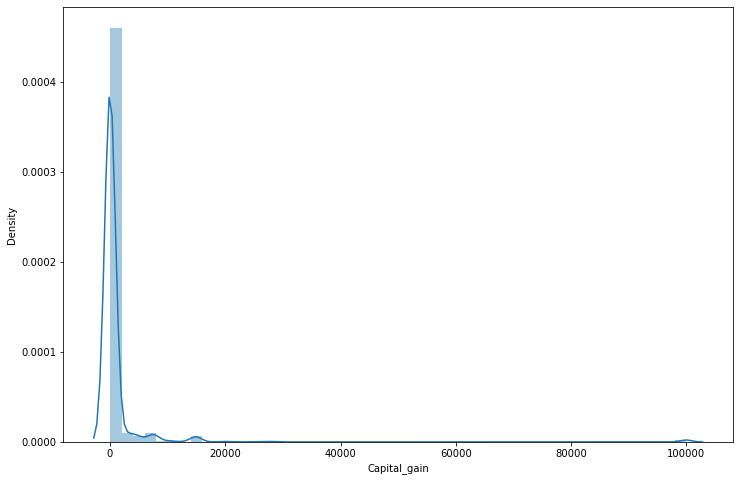

In [108]:
plt.figure(figsize=(12,8))
sns.distplot(df.Capital_gain, kde = True)

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

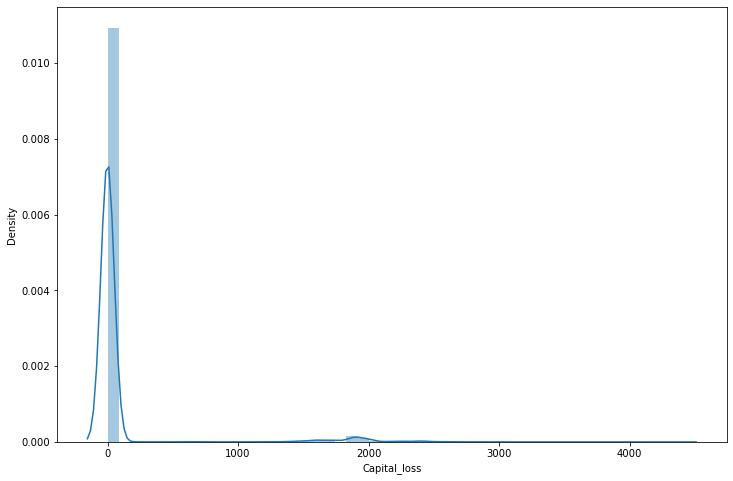

In [109]:
plt.figure(figsize=(12,8))
sns.distplot(df.Capital_loss, kde = True)

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

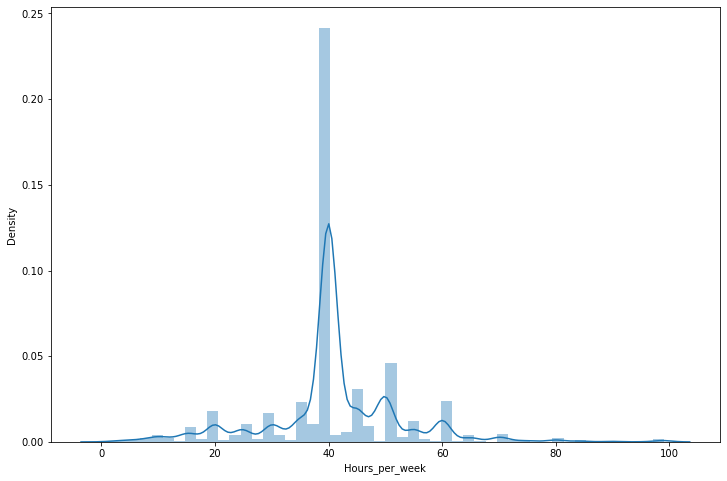

In [110]:
plt.figure(figsize=(12,8))
sns.distplot(df.Hours_per_week, kde = True)

# Checking overall correlation matrix

In [114]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076511,0.043525,0.080154,0.060166,0.101599
Fnlwgt,-0.076511,1.000000,-0.044954,0.000427,-0.009757,-0.022889
Education_num,0.043525,-0.044954,1.000000,0.124413,0.079656,0.152528
Capital_gain,0.080154,0.000427,0.124413,1.000000,-0.032228,0.080432
Capital_loss,0.060166,-0.009757,0.079656,-0.032228,1.000000,0.052417
Hours_per_week,0.101599,-0.022889,0.152528,0.080432,0.052417,1.000000


<AxesSubplot:>

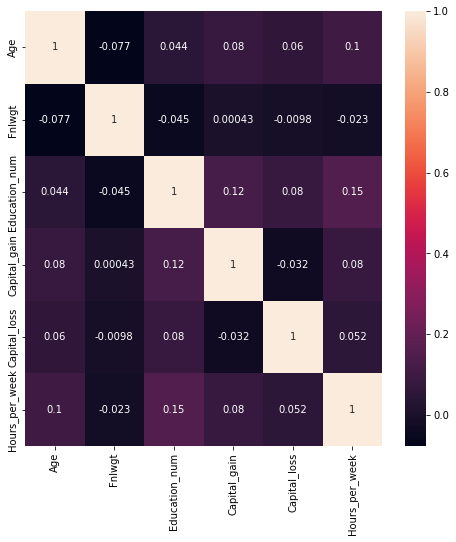

In [115]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True)

# Removing Outliers

<AxesSubplot:>

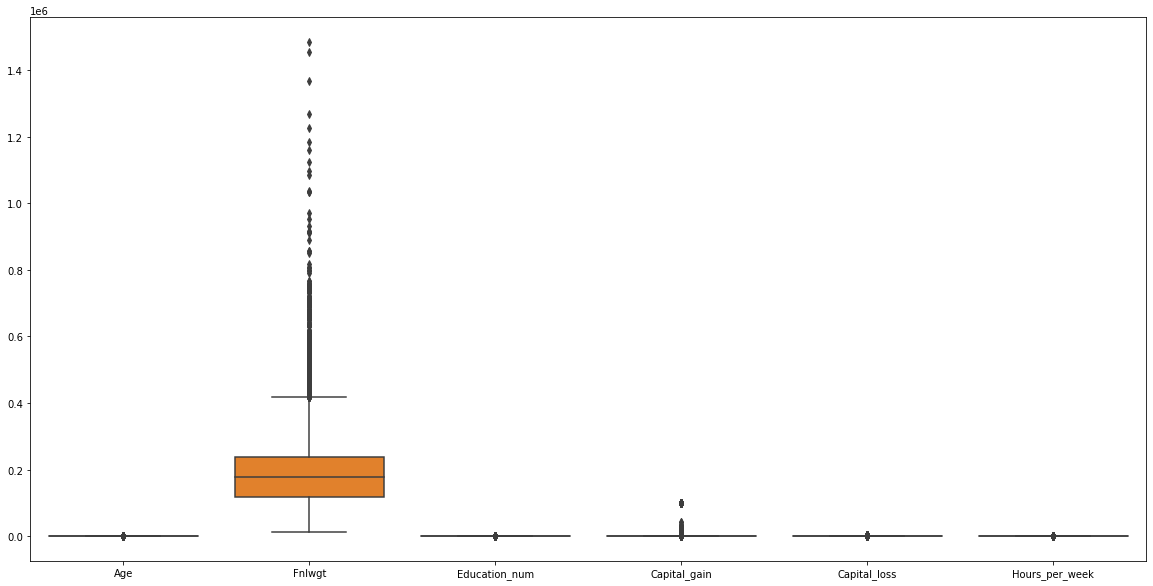

In [116]:
from pylab import rcParams  # for plotting box plot, to check outliers

rcParams['figure.figsize'] = 20, 10
sns.boxplot(data = df)

In [118]:
features = [feature for feature in df.columns if df[feature].dtype != 'O']

Age                  AxesSubplot(0.125,0.657941;0.168478x0.222059)
Fnlwgt            AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Education_num     AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Capital_gain      AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Capital_loss         AxesSubplot(0.125,0.391471;0.168478x0.222059)
Hours_per_week    AxesSubplot(0.327174,0.391471;0.168478x0.222059)
dtype: object

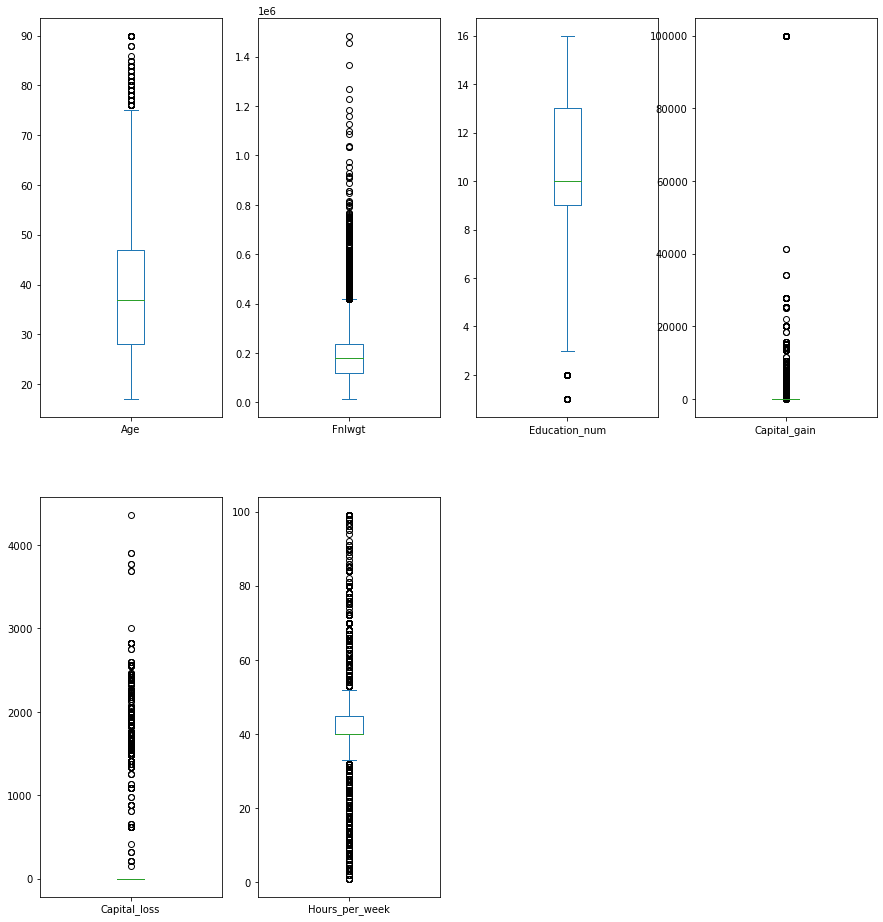

In [119]:
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(15,25))

### Conclusion- 
   - We have found some outliers in age, Fnlwgt, Education_num, Capital_gain, Capital_loss, Hours_per_week

In [120]:
dic = {}
for feature in features:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    upper_bond = df[feature].quantile(0.75) + (IQR * 1.5)
    lower_bond = df[feature].quantile(0.25) - (IQR * 1.5)
    
    df[feature] = np.where(df[feature]>upper_bond,upper_bond,df[feature])
    df[feature] = np.where(df[feature]<lower_bond,lower_bond,df[feature])

Age                  AxesSubplot(0.125,0.657941;0.168478x0.222059)
Fnlwgt            AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Education_num     AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Capital_gain      AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Capital_loss         AxesSubplot(0.125,0.391471;0.168478x0.222059)
Hours_per_week    AxesSubplot(0.327174,0.391471;0.168478x0.222059)
dtype: object

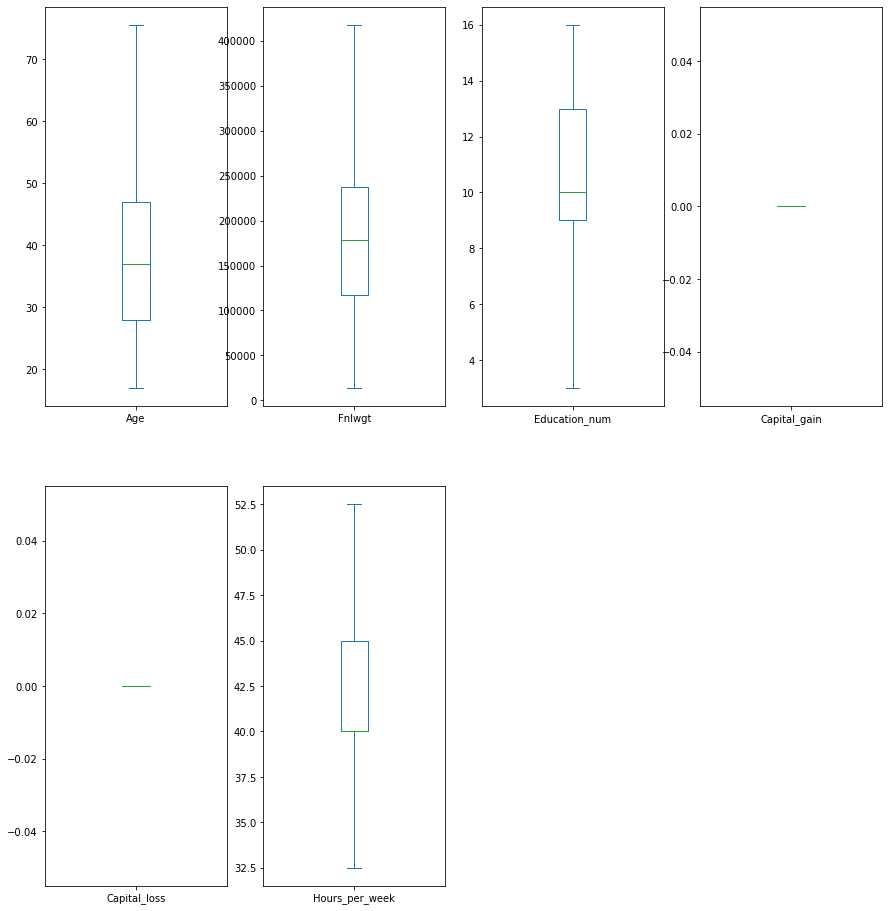

In [121]:
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(15,25))

In [122]:
df.skew()

Age               0.469496
Fnlwgt            0.552773
Education_num    -0.232735
Capital_gain      0.000000
Capital_loss      0.000000
Hours_per_week    0.419154
dtype: float64

### Conclusion - 
   - After dropping, there are no outliers present in data. Check skewness of data.

# Variable Encoding

In [124]:
df.head(2)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,United-States,<=50K
1,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K


In [123]:
le = LabelEncoder()

In [125]:
df['Workclass']=le.fit_transform(df['Workclass'])
df['Education']=le.fit_transform(df['Education'])
df['Marital_status']=le.fit_transform(df['Marital_status'])
df['Occupation']=le.fit_transform(df['Occupation'])
df['Relationship']=le.fit_transform(df['Relationship'])
df['Sex']=le.fit_transform(df['Sex'])
df['Native_country']=le.fit_transform(df['Native_country'])
df['Income']=le.fit_transform(df['Income'])

In [126]:
df.corr()["Income"].sort_values()

Relationship     -0.251009
Marital_status   -0.193504
Fnlwgt           -0.008066
Workclass         0.018103
Native_country    0.023273
Occupation        0.051551
Education         0.078981
Sex               0.216715
Age               0.244434
Hours_per_week    0.268361
Education_num     0.336943
Income            1.000000
Capital_gain           NaN
Capital_loss           NaN
Name: Income, dtype: float64

# Checking Skewness and Distribution of Data

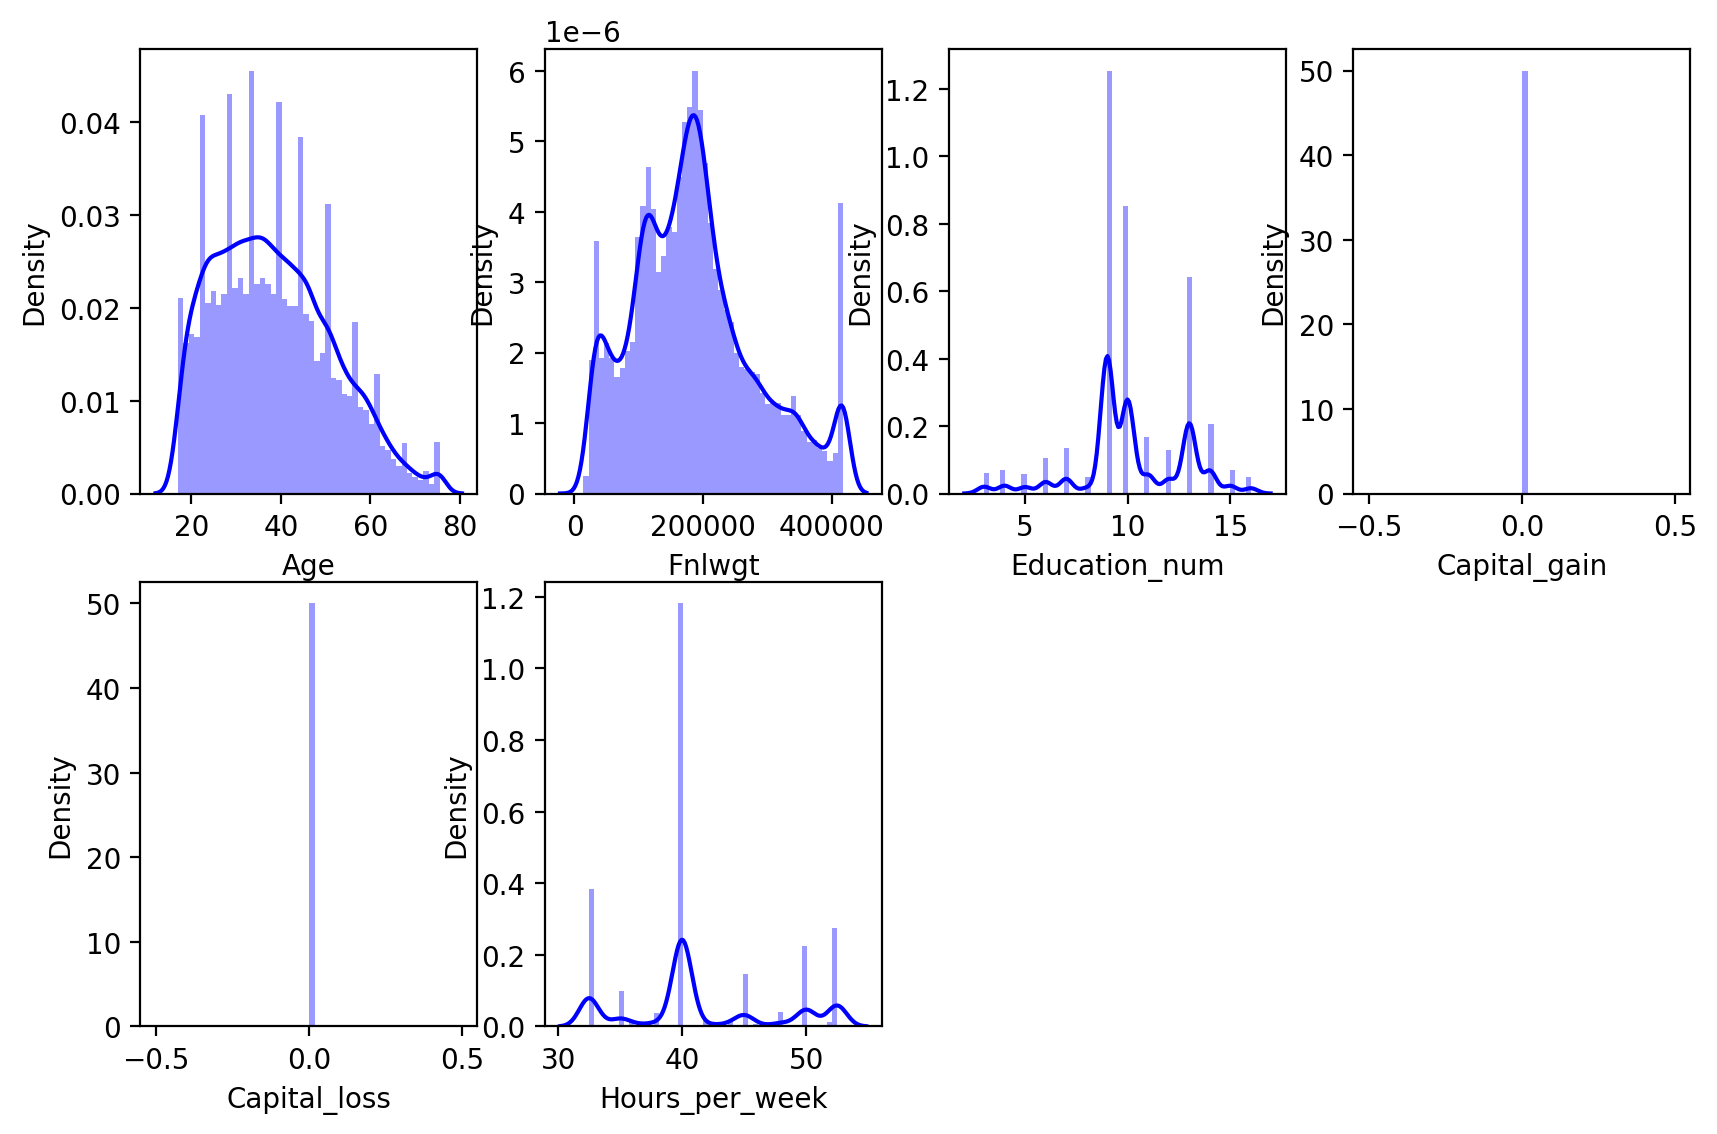

In [132]:
plt.figure(figsize=(10,10),dpi=200)
for i in enumerate(df[numerical_data]):
    plt.subplot(3,4,i[0]+1)
    sns.distplot(df[i[1]],color='b')

# Conclusion - 
Looking at the above distribution plots we can see that there is skewness. Still there are many that are showing a bell shape curve indicating a normal distribution.

In [143]:
categorical_data

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [156]:
le = LabelEncoder()

In [157]:
for feature in categorical_data:
    df[feature]=le.fit_transform(df[feature])

In [158]:
x = df[{'Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num','Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country'}]

In [159]:
y = df[{'Income'}]

# Variance Inflation Factor

In [161]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [162]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [163]:
type(x)

pandas.core.frame.DataFrame

In [164]:
calc_vif(x)

,variables,VIF FACTOR
0,Hours_per_week,38.431704
1,Fnlwgt,4.645524
2,Occupation,3.218426
3,Age,9.938548
4,Relationship,2.633486
5,Capital_gain,NaN
6,Education,9.451769
7,Race,19.282772
8,Workclass,6.304670
9,Capital_loss,NaN


In [165]:
x.drop('Native_country', axis=1, inplace=True)
calc_vif(x)

,variables,VIF FACTOR
0,Hours_per_week,34.957037
1,Fnlwgt,4.636061
2,Occupation,3.213333
3,Age,9.691722
4,Relationship,2.542309
5,Capital_gain,NaN
6,Education,9.331942
7,Race,17.631377
8,Workclass,6.279816
9,Capital_loss,NaN


In [166]:
x.drop('Hours_per_week', axis=1, inplace=True)
calc_vif(x)

,variables,VIF FACTOR
0,Fnlwgt,4.531423
1,Occupation,3.191019
2,Age,8.760113
3,Relationship,2.490252
4,Capital_gain,NaN
5,Education,9.211563
6,Race,15.381402
7,Workclass,6.151259
8,Capital_loss,NaN
9,Marital_status,3.899210


In [167]:
x.drop('Education_num', axis=1, inplace=True)
calc_vif(x)

,variables,VIF FACTOR
0,Fnlwgt,4.503310
1,Occupation,3.098609
2,Age,8.311487
3,Relationship,2.478436
4,Capital_gain,NaN
5,Education,7.275039
6,Race,14.320110
7,Workclass,6.076373
8,Capital_loss,NaN
9,Marital_status,3.856342


# Scaling the independant variable (x) to get all the columns in a standard scale

In [168]:
sc=StandardScaler()
x1=sc.fit_transform(x)
x1

array([[-1.08691884, -0.73460884,  0.8901557 , ...,  0.        ,
        -0.38724263,  0.69282316],
       [ 0.30166515, -0.23825952, -0.03104284, ...,  0.        ,
        -1.72236208,  0.69282316],
       [ 0.5018181 , -0.23825952,  1.12045534, ...,  0.        ,
        -0.38724263,  0.69282316],
       ...,
       [-0.36711325, -1.47913282,  1.50428806, ...,  0.        ,
         2.28299626, -1.44336977],
       [ 0.15312701, -1.47913282, -1.25930757, ...,  0.        ,
         0.94787682,  0.69282316],
       [ 1.06010578, -0.73460884,  1.04368879, ...,  0.        ,
        -0.38724263, -1.44336977]])

In [169]:
x = pd.DataFrame(x1,columns=x.columns)

In [170]:
x

,Fnlwgt,Occupation,Age,Relationship,Capital_gain,Education,Race,Workclass,Capital_loss,Marital_status,Sex
0,-1.086919,-0.734609,0.890156,-0.885732,0.0,-0.349871,0.385055,1.888018,0.0,-0.387243,0.692823
1,0.301665,-0.238260,-0.031043,-0.261254,0.0,0.174749,0.385055,-0.208884,0.0,-1.722362,0.692823
2,0.501818,-0.238260,1.120455,-0.885732,0.0,-2.448351,-2.010994,-0.208884,0.0,-0.387243,0.692823
3,1.589811,0.754439,-0.798708,2.236660,0.0,-0.349871,-2.010994,-0.208884,0.0,-0.387243,-1.443370
4,1.025007,-0.734609,-0.107809,2.236660,0.0,0.437059,0.385055,-0.208884,0.0,-0.387243,-1.443370
...,...,...,...,...,...,...,...,...,...,...,...
30156,0.738759,1.498963,-0.875475,2.236660,0.0,-0.874491,0.385055,-0.208884,0.0,-0.387243,-1.443370
30157,-0.341259,0.009915,0.122490,-0.885732,0.0,0.174749,0.385055,-0.208884,0.0,-0.387243,0.692823
30158,-0.367113,-1.479133,1.504288,1.612182,0.0,0.174749,0.385055,-0.208884,0.0,2.282996,-1.443370
30159,0.153127,-1.479133,-1.259308,0.987703,0.0,0.174749,0.385055,-0.208884,0.0,0.947877,0.692823


# Data is ready for Machine Learning Models

In [171]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

## Algorithms to apply

In [172]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
lg=LogisticRegression()
knc=KNeighborsClassifier()
sgc=SGDClassifier()

In [173]:
seed=7
#prepare models
models=[]
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('KNeighborsClassifier',knc))
models.append(('SGDClassifier',sgc))
models.append(('LogisticRegression',lg))

************** DecisionTreeClassifier ***********


DecisionTreeClassifier()


accuracy score 0.7619757997679429
Cross-val-score= 0.7663296310270721


roc_auc_score 0.6822883560716464


              precision    recall  f1-score   support

           0       0.84      0.84      0.84      4510
           1       0.53      0.52      0.53      1523

    accuracy                           0.76      6033
   macro avg       0.68      0.68      0.68      6033
weighted avg       0.76      0.76      0.76      6033



[[3803  707]
 [ 729  794]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


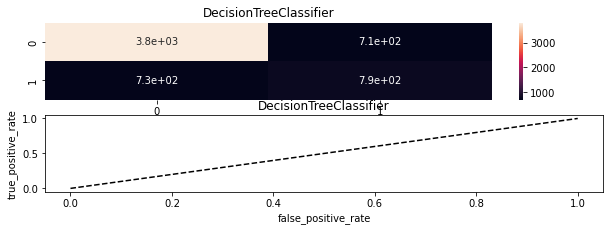

************** RandomForestClassifier ***********


RandomForestClassifier()


accuracy score 0.814685894248301
Cross-val-score= 0.8119609852381965


roc_auc_score 0.7203699956178217


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4510
           1       0.67      0.53      0.59      1523

    accuracy                           0.81      6033
   macro avg       0.76      0.72      0.74      6033
weighted avg       0.81      0.81      0.81      6033



[[4108  402]
 [ 716  807]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


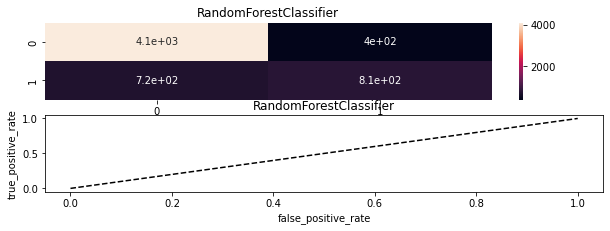

************** KNeighborsClassifier ***********


KNeighborsClassifier()


accuracy score 0.7976131277971159
Cross-val-score= 0.7986572524860158


roc_auc_score 0.7109078388581295


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4510
           1       0.61      0.54      0.57      1523

    accuracy                           0.80      6033
   macro avg       0.73      0.71      0.72      6033
weighted avg       0.79      0.80      0.79      6033



[[3996  514]
 [ 707  816]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


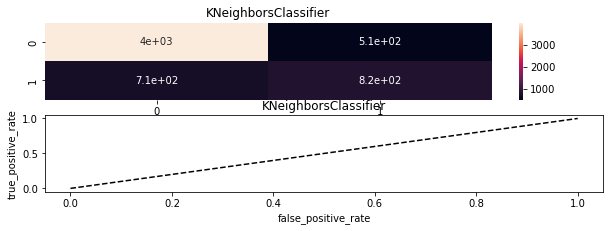

************** SGDClassifier ***********


SGDClassifier()


accuracy score 0.7475551135421846
Cross-val-score= 0.7519479546596346


roc_auc_score 0.5


              precision    recall  f1-score   support

           0       0.75      1.00      0.86      4510
           1       0.00      0.00      0.00      1523

    accuracy                           0.75      6033
   macro avg       0.37      0.50      0.43      6033
weighted avg       0.56      0.75      0.64      6033



[[4510    0]
 [1523    0]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


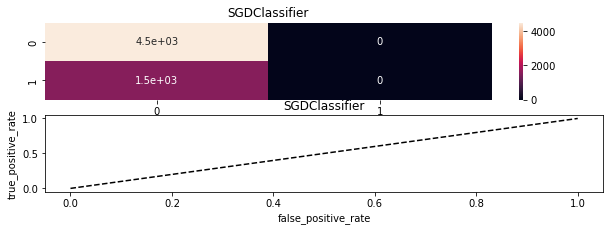

************** LogisticRegression ***********


LogisticRegression()


accuracy score 0.7379413227250124
Cross-val-score= 0.7463945639945045


roc_auc_score 0.5364044736072026


              precision    recall  f1-score   support

           0       0.76      0.94      0.84      4510
           1       0.44      0.13      0.20      1523

    accuracy                           0.74      6033
   macro avg       0.60      0.54      0.52      6033
weighted avg       0.68      0.74      0.68      6033



[[4255  255]
 [1326  197]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


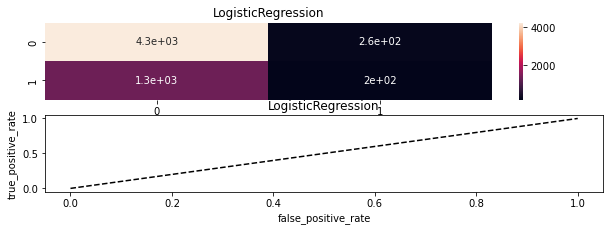

In [174]:
#evaluate each model in turn
Model=[]
cvs=[]
score=[]
rocscore=[]
for name,model in models:
    print('**************',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    acc=accuracy_score(y_test,pred)
    print('accuracy score',acc)
    score.append(acc*100)
    kfold=model_selection.KFold(n_splits=10)
    # ---------------------------------------------------------------------------------------------------------
    
    cv=model_selection.cross_val_score(model,x_train,y_train,cv=10,scoring='accuracy').mean()
    print('Cross-val-score=',cv)
    cvs.append(cv*100)
    print('\n')
    # ---------------------------------------------------------------------------------------------------------
        
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred, pos_label=2)
    roc_auc=roc_auc_score(y_test,pred)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print(classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    
    plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('false_positive_rate')
    plt.ylabel('true_positive_rate')
    plt.show()

 ------------------------ Results with Random State 0 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  76.247535  76.645119  69.225684
1      RandomForestClassifier  81.531777  82.081883  72.509207
2        KNeighborsClassifier  79.521659  80.523786  71.796347
3               SGDClassifier  74.838360  76.147853  50.000000
4          LogisticRegression  74.365873  74.689209  54.053373
5                   LinearSVC  74.274700  75.070446  51.583364
6  GradientBoostingClassifier  83.168877  83.971490  74.704459
7                  GaussianNB  74.879788  75.816343  74.265342
 ------------------------ Results with Random State 1 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  76.719954  76.694845  68.852114
1      RandomForestClassifier  81.639628  81.219957  71.899818
2        KNeighborsClassifier  79.828395  79.711586  71.021777
3               SGDClas

KeyboardInterrupt: 

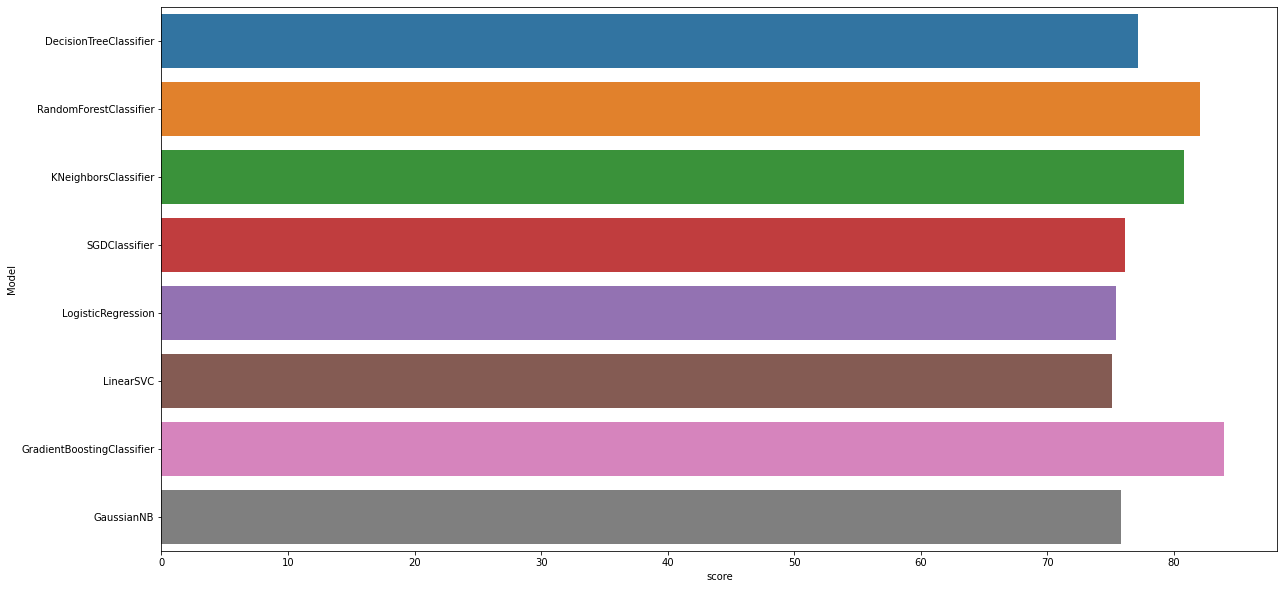

In [175]:
for i in [0, 1, 5, 7, 9, 14, 18, 19, 23, 27, 35, 40, 47, 57, 59, 62, 75, 81, 87, 89, 91, 93, 96, 99, 101, 107, 109]:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    
    sc=StandardScaler()
    x_train=sc.fit_transform(x_train)
    x_test=sc.fit_transform(x_test)
    
    
    dtc=DecisionTreeClassifier()
    rfc=RandomForestClassifier()
    lg=LogisticRegression()
    knc=KNeighborsClassifier()
    sgc=SGDClassifier()
    svc = LinearSVC()
    gbc = GradientBoostingClassifier()
    gnb = GaussianNB()
    
    
    seed=7
    #prepare models
    models=[]
    models.append(('DecisionTreeClassifier',dtc))
    models.append(('RandomForestClassifier',rfc))
    models.append(('KNeighborsClassifier',knc))
    models.append(('SGDClassifier',sgc))
    models.append(('LogisticRegression',lg))
    models.append(('LinearSVC', svc))
    models.append(('GradientBoostingClassifier', gbc))
    models.append(('GaussianNB', gnb))
    
    
    
    #evaluate each model in turn ----------------------------------------------------------------------------------------
    Model=[]
    cvs=[]
    score=[]
    rocscore=[]
    for name,model in models:
        # print('**************',name,'***********')
        # print('\n')
        Model.append(name)
        model.fit(x_train,y_train)
        # print(model)
        pred=model.predict(x_test)
        # print('\n')
        acc=accuracy_score(y_test,pred)
        # print('accuracy score',acc)
        score.append(acc*100)
        kfold=model_selection.KFold(n_splits=10)
        # ---------------------------------------------------------------------------------------------------------

        cv=model_selection.cross_val_score(model,x_train,y_train,cv=10,scoring='accuracy').mean()
        # print('Cross-val-score=',cv)
        cvs.append(cv*100)
        # print('\n')
        # ---------------------------------------------------------------------------------------------------------

        false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred, pos_label=2)
        roc_auc=roc_auc_score(y_test,pred)
        # print('roc_auc_score',roc_auc)
        rocscore.append(roc_auc*100)
        # print('\n')
        # print(classification_report(y_test,pred))
        # print('\n')
        cm=confusion_matrix(y_test,pred)
        # print(cm)
        # print('\n')
        # plt.figure(figsize=(10,15))
        # plt.subplot(911)
        # plt.title(name)
        # print(sns.heatmap(cm,annot=True))
        # plt.subplot(912)
        # plt.title(name)

        # plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
        # plt.plot([0,1],[0,1],'k--')
        # plt.xlabel('false_positive_rate')
        # plt.ylabel('true_positive_rate')
        # plt.show()

        
    result=pd.DataFrame({'Model':Model, 'cvs' :cvs, 'score' :score, 'rocscore' :rocscore}, columns=['Model', 'cvs','score','rocscore'])
    print(f'\033[1m ------------------------ Results with Random State {i} ------------------------')
    print(result)
    sns.barplot(y='Model',x='score',data=result)
    result['score']

<AxesSubplot:xlabel='score', ylabel='Model'>

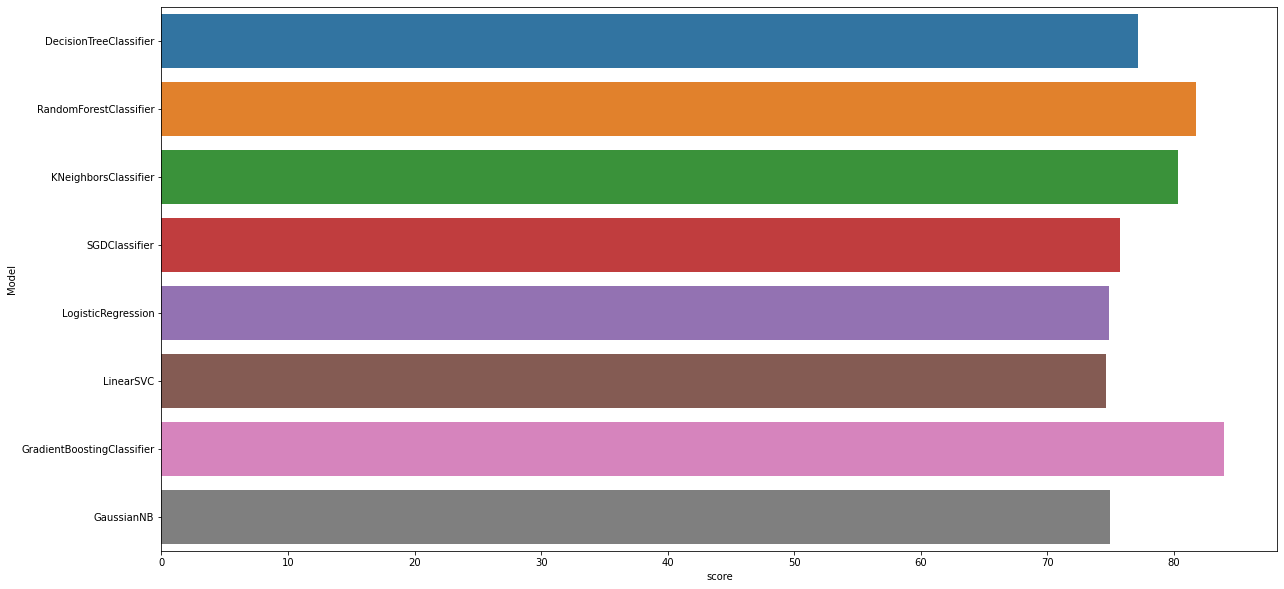

In [176]:
sns.barplot(y='Model',x='score',data=result)

# Parameter Tuning

In [177]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

## Random Forcast

In [178]:
params_dict={'n_estimators':[500],'max_features':['auto','sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),param_grid=params_dict,scoring='accuracy',cv=10)
clf_rf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [500]},
             scoring='accuracy')

In [179]:
clf_rf.best_score_

0.8140397117192771

In [180]:
clf_rf.best_params_

{'max_features': 'log2', 'n_estimators': 500}

In [181]:
clf_rf_df = pd.DataFrame(clf_rf.cv_results_)
clf_rf_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.211422,0.680215,0.088344,0.012730,auto,500,"{'max_features': 'auto', 'n_estimators': 500}",0.807765,0.818182,0.812411,0.816675,0.801042,0.815253,0.813832,0.828991,0.815253,0.810990,0.814040,0.006862,2
1,1.017493,0.027934,0.090338,0.006174,sqrt,500,"{'max_features': 'sqrt', 'n_estimators': 500}",0.805871,0.818655,0.811937,0.811937,0.799147,0.815253,0.816201,0.823780,0.815727,0.807674,0.812618,0.006655,3
2,1.080249,0.049319,0.098092,0.011524,log2,500,"{'max_features': 'log2', 'n_estimators': 500}",0.805398,0.816288,0.812885,0.817622,0.801516,0.814780,0.818096,0.828991,0.814780,0.810043,0.814040,0.007126,1


In [182]:
pred=clf_rf.predict(x_test)
print(round(accuracy_score(pred,y_test), 3) * 100, '%')   # actual accuarcy on our test set.

81.8 %


# Creting Model For Predicting Survived or Not

In [183]:
# Save File
import pickle
file = 'income_predictor'
#save file
save = pickle.dump(clf_rf,open(file,'wb'))